# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\tj4sy\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


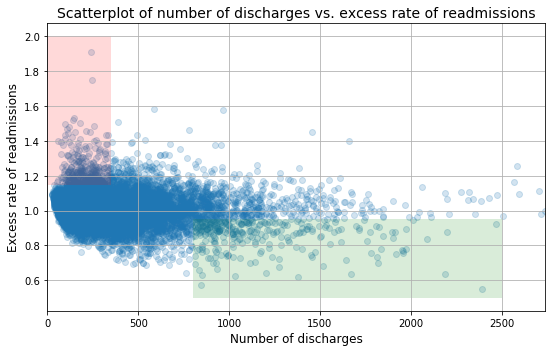

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Note: Upon inspecting the data in the link provided, we know that each row is a hospital; there are 19,800 rows and 12 columns. 

In [5]:
#make sure we have a good idea of what the dataset used for the analysis looks like
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [6]:
#compared to the original
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [8]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


# Section A: Do you agree with the above analysis and recommendations? Why or why not?

While some of the logic in their analysis and recommendations do make sense, the analysis is not sufficient and does not provide enough evidence to arrive at these conclusions. 

What is missing: 

1) The analysis seems to have been conducted solely on the scatter plot generated, with computing a hypothesis or the necessary statistics to validate the observations seen in the plot. 

2) The observations highlighted in their analysis does not go very deep and is not quantified ("increasing number of discharges", "greater incidence of excess rate", etc.). From these statements, we don't actually get any sense of the scale of the trends observed. 

3) There seems to be gaps in the segment statistical analysis described. The means are presented on two primary groups (discharges<100 and discharges>1000), but were other groups tested? How were these groups decided on? And it's difficult to place these segments into the context of the data, as there are no summarys statistics presented on the whole dataset. 

4) Again, the conclusions aren't backed up by any statistical measure ("significant correlation" -- how was this measured?). 

5) There is only one possible conclusion drawn from the analysis, that "smaller hospitals" lack capacity, but it's not clear how "small hospitals" are defined and what other conclusions might be drawn from observing this relationship. 

6) It becomes even more confusing when we see "small hospitals" defined as discharges<300, when the two groups described in the segment analysis were discharges<100 and discharges>1000. 

7) When drawing strong conclusions like this, it's a good idea explore other variables that could effect the relationship we observe to verify that number of discharges is an accurate proxy for "hospital capacity".

8) The possibility of a relationship between hospitals with missing disharge numbers could have also been explored more. 

9) While the missing values were dealt with in the discharge column, there are still "NaN" values in other important columns, such as the Excess Readmissions Ratio column. 

10) I also wouldn't agree with the labeling in their scatterplot -- they've labeled the Excess Readmissions Ratio as a "Rate", but this isn't quite correct and could lead to wrong interpretation of the data.


What was done right: 

1) The data was cleaned for missing data by dropping rows with null values. 

2) The analysis started with a visual representation of the data to get a sense of the relationship in question (but, again, did not expand on this much further.)

# Section B: Provide support for your arguments and your own recommendations with a statistically sound analysis. 

In [17]:
#First, let's get a sense of how many missing values are in other columns
print(hospital_read_df.isnull().sum())
hospital_read_df.shape

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64


(16860, 12)

In [18]:
#missing data remaining from other data frame
print(clean_hospital_read_df.isnull().sum())
clean_hospital_read_df.shape

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64


(11578, 12)

In [12]:
#verifying that
newclean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']

In [52]:
newclean_hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

In [14]:
clean_hospital_read_df.shape

(11578, 12)

In [19]:
#create a new full dataframe with no missing values (except for footnote)
main_df = clean_hospital_read_df[clean_hospital_read_df["Excess Readmission Ratio"].notnull()]

In [22]:
print(main_df.head())
main_df.shape

                                          Hospital Name  Provider Number  \
1832  UNIVERSITY OF MD CHARLES REGIONAL  MEDICAL CENTER           210035   
1699                          ATLANTIC GENERAL HOSPITAL           210061   
1774                           MERCY MEDICAL CENTER INC           210008   
1853             KAISER FOUNDATION HOSPITAL-SANTA CLARA            50071   
1290                                 PALMERTON HOSPITAL           390019   

     State       Measure Name  Number of Discharges  Footnote  \
1832    MD  READM-30-AMI-HRRP                    25       NaN   
1699    MD  READM-30-AMI-HRRP                    27       NaN   
1774    MD  READM-30-AMI-HRRP                    28       NaN   
1853    CA   READM-30-HF-HRRP                    29       NaN   
1290    PA  READM-30-AMI-HRRP                    30       NaN   

      Excess Readmission Ratio  Predicted Readmission Rate  \
1832                    1.0914                        26.8   
1699                    1.09

(11497, 12)

In [23]:
main_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

Note: We'll use this dataset with no "null" values to set up our hypothesis.

In [58]:
#import additional libraries for the analysis
import seaborn as sns
from scipy import stats
import statsmodels.stats.api as sms

In [25]:
#first, let's see how our data and findings hold to their claim concerning correlation
main_df[['Number of Discharges', 'Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


Note: We've verified that there IS a correlation betewen number of discharges and excess readmission ratio, but it's quite small. This presents some evidence against the claim that there is a strong correlation as claimed in the initial analysis. 

In [63]:
#we also want to check what kind of date ranges exist 
main_df['Start Date'].value_counts()

07/01/2010    11497
Name: Start Date, dtype: int64

In [64]:
main_df['End Date'].value_counts()

06/30/2013    11497
Name: End Date, dtype: int64

## Question B1: Setup an appropriate hypothesis test. 

In [27]:
#Let's start our analysis with pulling some summary statistics again
main_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11497.000000,11497.000000,0.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257571.540141,365.466209,NaN,1.007504,17.984292,17.865695,63.633731
std,154274.374018,308.754590,NaN,0.091964,5.487651,5.240749,59.540296
min,10001.000000,25.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110129.000000,160.000000,NaN,0.952600,16.300000,16.600000,24.000000
50%,250042.000000,282.000000,NaN,1.003500,19.000000,19.000000,45.000000
75%,390039.000000,474.000000,NaN,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,NaN,1.909500,32.800000,28.000000,879.000000


Note: We are now working with a dataset of 11497 observations, and the mean number of discharges is approx. 365. Let's pull up a histogram to get a better sense of the distribution. 

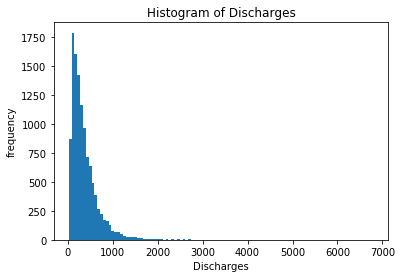

365.4662085761503
308.7411622305337


In [32]:
#histogram plot using sqrt rule for bins
df_discharges = sorted(main_df['Number of Discharges'])
n_df_discharges = len(main_df)

n_bins = int(np.sqrt(n_df_discharges))

#compute mean and standard deviation
mean_discharges = np.mean(df_discharges)
std_discharges = np.std(df_discharges)

#plot histogram
_ = plt.hist(df_discharges, bins=n_bins)

#label title and axises
#label title and axises
_ = plt.title('Histogram of Discharges')
_ = plt.xlabel('Discharges')
_ = plt.ylabel('frequency')

plt.show()
print(mean_discharges)
print(std_discharges)

1.0075037835957206
0.0919602664563124


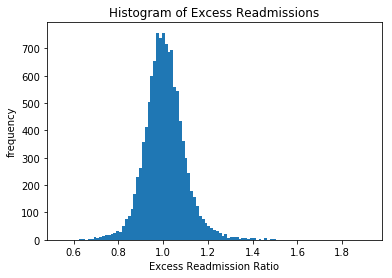

In [30]:
#do the same for excess readmission ratio
df_ratio = sorted(main_df['Excess Readmission Ratio'])

mean_ratio = np.mean(df_ratio)
std_ratio = np.std(df_ratio)

#plot histogram
_ = plt.hist(df_ratio, bins=n_bins)

#label title and axises
#label title and axises
_ = plt.title('Histogram of Excess Readmissions')
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('frequency')


print(mean_ratio)
print(std_ratio)

Note: The distribution of discharges shows large outliers and a distribution with a larger right tail, starting ~1000. This provides some rationale as to why 1000 was chosen as the cut off for one of the groups in the original analysis. The distribution of excess readmission ratios appears to be normal centered at a mean of 1.01

In [44]:
#for context, how many unique hospitals are there? 
print('Number of hospitals: ', main_df['Hospital Name'].nunique())

Number of hospitals:  2879


In [43]:
#estimating number of outliers on disharges
print('Number of potential outliers:', main_df['Number of Discharges'][main_df['Number of Discharges'] >= 1000].count())

Number of potential outliers: 464


### Stating our Hypothesis

In evaluating the prior claim that there is a strong correlation between excess readmission ratio and the discharge number (interpreted as hospital capacity), our hypothesis will be framed as the following: 

* Null Hypothesis: discharge number DOES NOT effect excess readmission ratio (excess readmission = in both small and large hospitals/discharge rates)
* Alternative Hypothesis: discharge number DOES effect excess readmission ratio (excess readmission != in both small and large hospitals/discharge rates)

In [49]:
#let's set up some dataframes for our two groups of interest
large_group = main_df[(main_df['Number of Discharges'] > 1000)]

print('Number of hospitals with large number of discharges (>1000):', len(large_group))
print('Mean Excess Readmissions Ratio:', large_group['Excess Readmission Ratio'].mean())
print('Percent > 1:', len(large_group[large_group['Excess Readmission Ratio'] > 1]) / len(large_group) * 100)

Number of hospitals with large number of discharges (>1000): 463
Mean Excess Readmissions Ratio: 0.9783354211663071
Percent > 1: 44.49244060475162


Note: From these calculations, we can see the prior analysis was correct in their estimations on the larger group.

In [50]:
#let's set up some dataframes for our two groups of interest
small_group = main_df[(main_df['Number of Discharges'] < 100)]

print('Number of hospitals with small number of discharges (<100):', len(small_group))
print('Mean Excess Readmissions Ratio:', small_group['Excess Readmission Ratio'].mean())
print('Percent > 1:', len(small_group[small_group['Excess Readmission Ratio'] > 1]) / len(small_group) * 100)

Number of hospitals with small number of discharges (<100): 1188
Mean Excess Readmissions Ratio: 1.0226183501683506
Percent > 1: 63.215488215488215


Note: From these calculations, we can see the prior analysis was correct in their estimations on the smaller group.

In [54]:
#create a two sample t-test
t_test = stats.ttest_ind(small_group['Excess Readmission Ratio'], large_group['Excess Readmission Ratio'])

#using the means to compare the two groups
means = sms.CompareMeans(sms.DescrStatsW(small_group['Excess Readmission Ratio']), sms.DescrStatsW(large_group['Excess Readmission Ratio']))

#using a 99% confidence interval (a = 0.01)
print('99% CI of the difference of means: ', means.tconfint_diff(alpha = 0.01, usevar='unequal'))
print(t_test)

99% CI of the difference of means:  (0.029225356358290495, 0.05934050164579684)
Ttest_indResult(statistic=10.060620398500793, pvalue=3.778753923341558e-23)


Note: From our t test above at a 99% confidence interval, we can reject the null hypothesis. It looks like there is 99% chance that the difference between the means is between 0.029 and 0.059.

In [56]:
#for interest, we also analyze the hypothesis with a second smaller group (n<300)
small_group_2 = main_df[(main_df['Number of Discharges'] < 300)]

#create a two sample t-test
t_test = stats.ttest_ind(small_group_2['Excess Readmission Ratio'], large_group['Excess Readmission Ratio'])

#using the means to compare the two groups
means = sms.CompareMeans(sms.DescrStatsW(small_group_2['Excess Readmission Ratio']), sms.DescrStatsW(large_group['Excess Readmission Ratio']))

#using a 99% confidence interval (a = 0.01)
print('99% CI of the difference of means: ', means.tconfint_diff(alpha = 0.01, usevar='unequal'))
print(t_test)

99% CI of the difference of means:  (0.021225401248655816, 0.05058018078022384)
Ttest_indResult(statistic=8.69541238632045, pvalue=4.313008590876669e-18)


The original conclusion on the null hypothesis still holds. 

### Discuss statistical significance and practical significance. 

* Do they differ here? How does this change your recommendation to the client?

From our own analysis, we also retrieved a statistical significance demonstrating that the two groups are different and show a correlation between discharge rate and excess readmissions ratio. However, this statistical significance does not provide sufficient evidence for the recommendations that were proposed. 

We do not have enough evidence on the following claims: 
* That discharge rates directly and perfectly correlate to hospital size. There is no variable in this dataset to analyze this relationship. 
* That the benefits of implementing the proposed changes would outweigh the costs.

Thus, despite the fact that we've done a more rigorous statistical analysis which supports the preliminary analysis, does not translate to a practical significance in also supporting the recommendations.

#### Recommendations
Based on the data we have to work with, we do not observe strong enough relationships between excess readmission rate and discharge numbers to advise on any strong recommendations. Additional variables, such as hospital size, should be integrated into the analysis to inform actionable recommendations and validate assumptions on discharge rate. 

### Evaluate the scatterplot. 

The scatterplot from the preliminary analysis displays a relatively clear picture about the data and the relationships between the two variables in question, but does have some drawbacks. 
* Advantages: displays a foundational picture of the data in understanding the relationship
* Disadvantages: there are many data points displayed at one time creating a lot of overlap; it's a bit confusing to interpret since the two variables have very different distributions

#### Constructing another plot

Note: I'd like to address two primary problems with the first scatter plot: 
* the concentration and overlap of data points in one plot
* making the different distributions between the two variables a little more clear

C:\Users\tj4sy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


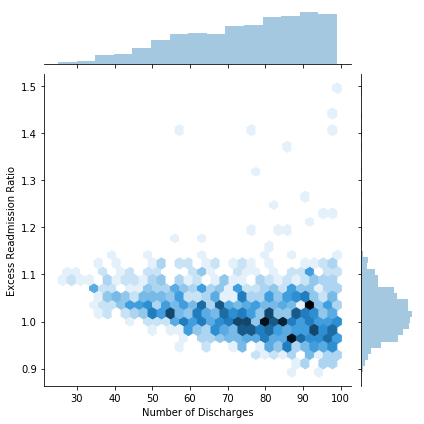

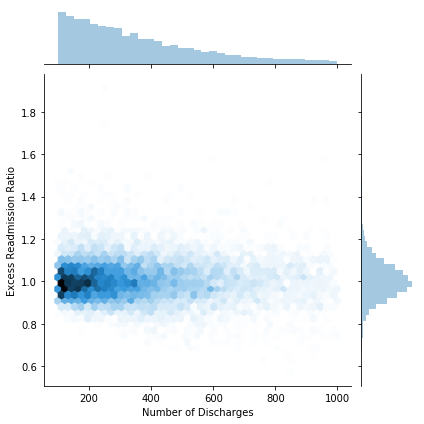

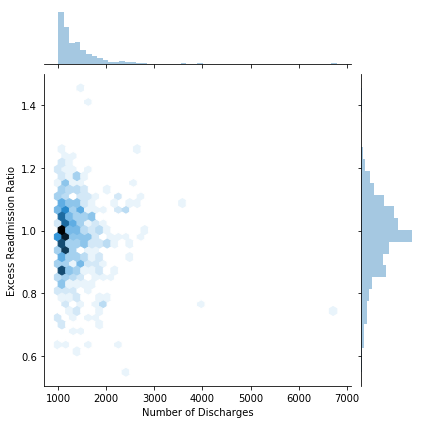

In [62]:
#let's separate out a few groups from the data based on our analysis above
small = main_df[(main_df['Number of Discharges'] < 100)]
med = main_df[(main_df['Number of Discharges'] < 1000) & (main_df['Number of Discharges'] > 100)]
large = main_df[(main_df['Number of Discharges'] > 1000)]
                
#generate plots
sns.jointplot(small['Number of Discharges'], small['Excess Readmission Ratio'], data=small, kind='hex')
sns.jointplot(med['Number of Discharges'], med['Excess Readmission Ratio'], data=med, kind='hex')
sns.jointplot(large['Number of Discharges'], large['Excess Readmission Ratio'], data=large, kind='hex')
plt.show()

Just from separating out the groups and showing the distributions on the plots, we get a much more meaningful picture of the relationship between excesss readmission ratio and number of discharges. 